# Regression

Different examples are provided for linear regression models.

You can find [here](https://www.kaggle.com/wkirgsn/electric-motor-temperature) the dataset for these examples. The objective is to predict the motor_speed in function of the other variables.
 
Load the dataset. 

In [45]:
import pandas as pd
df = pd.read_csv("data/pmsm_temperature_data.csv")
df.columns

Index(['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed', 'torque', 'i_d',
       'i_q', 'pm', 'stator_yoke', 'stator_tooth', 'stator_winding',
       'profile_id'],
      dtype='object')

Check if the data has NAs values.

In [46]:
df.isna().sum()

ambient           0
coolant           0
u_d               0
u_q               0
motor_speed       0
torque            0
i_d               0
i_q               0
pm                0
stator_yoke       0
stator_tooth      0
stator_winding    0
profile_id        0
dtype: int64

Split the dataframe into X - predictors and y - target

In [47]:
X = df.drop(["motor_speed"], axis=1)
y = df["motor_speed"]

Show the columns' names of the predictors

In [48]:
 X.columns

Index(['ambient', 'coolant', 'u_d', 'u_q', 'torque', 'i_d', 'i_q', 'pm',
       'stator_yoke', 'stator_tooth', 'stator_winding', 'profile_id'],
      dtype='object')

Split dataset into test/train using model_selection from sklearn. 

In [49]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20, random_state=20)

## Linear Regression

Fit the model with the training set and calculate the predictions for the test set. 

In [50]:
import math
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
lm = linear_model.LogisticRegression()
model = lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
print('R2-squared:', lm.score(X_test,y_test))
print('mean squared error:', mean_squared_error(y_test, predictions))
print('root squared mean squared error:', math.sqrt(mean_squared_error(y_test, predictions)))

R2-squared: 0.9278644469897314
mean squared error: 0.0723917963999066
root squared mean squared error: 0.2690572362898025


1. Show the intercept
2. Show the coefficients
3. Graph the feature importance of the variables into a bar plot

0.011740502983667621
[-4.89154009e-02  4.11265902e-01 -1.64767457e-01  5.38812224e-01
 -3.38560267e-01 -6.57712038e-01  1.32918836e-01  1.05157467e-01
 -1.62717688e+00  2.31779079e+00 -1.16784503e+00 -2.17762915e-04]
                Coefficient
ambient           -0.048915
coolant            0.411266
u_d               -0.164767
u_q                0.538812
torque            -0.338560
i_d               -0.657712
i_q                0.132919
pm                 0.105157
stator_yoke       -1.627177
stator_tooth       2.317791
stator_winding    -1.167845
profile_id        -0.000218


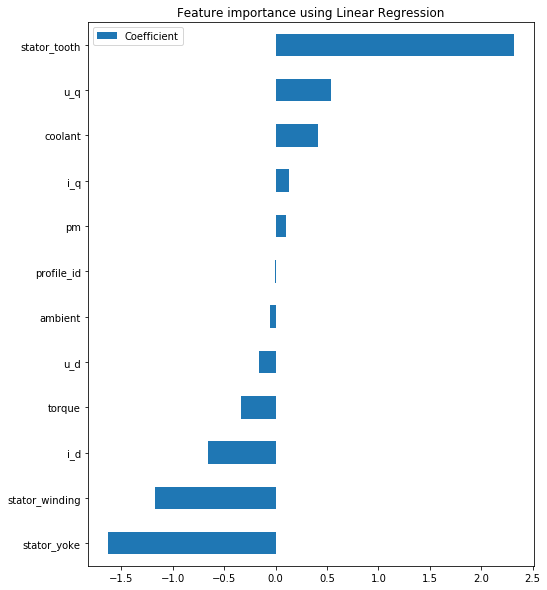

In [51]:
#show the intercept
print(model.intercept_)

#show the coefficients
print(model.coef_)

#show coefficients
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])  
print(coeff_df)

imp_coef = coeff_df.sort_values(by='Coefficient')
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Linear Regression")
plt.show()

Plot actual vs predicted values

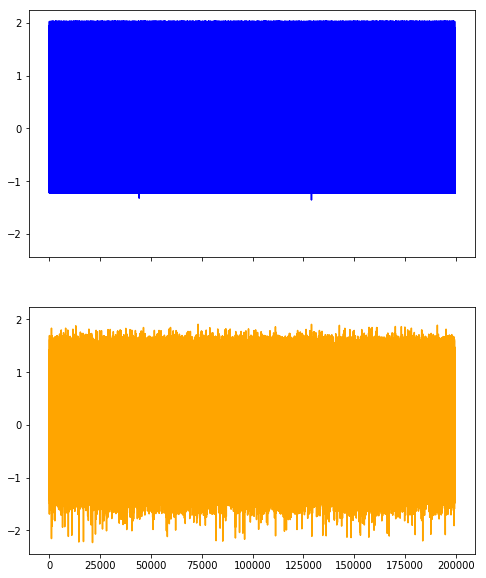

In [52]:
fig, ax = plt.subplots(2, sharex=True, sharey=True)
ax[0].plot(y_test.to_numpy(), color = 'blue')
ax[1].plot(predictions, color = 'orange')
plt.show()

## Lasso Regression

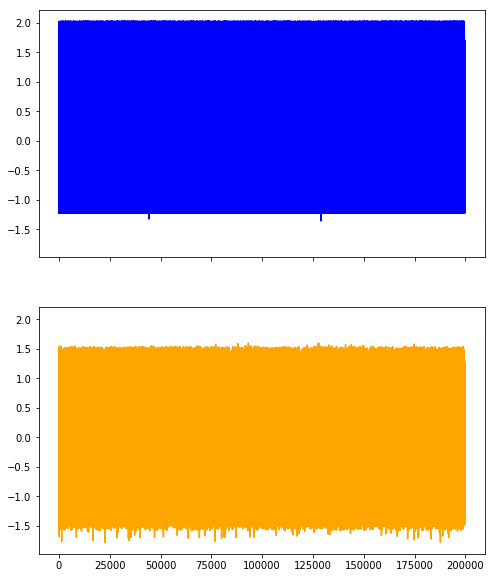

                Coefficient
ambient           -0.016219
coolant            0.000000
u_d               -0.153731
u_q                0.582772
torque            -0.148415
i_d               -0.611263
i_q               -0.057324
pm                 0.133706
stator_yoke       -0.000000
stator_tooth      -0.000000
stator_winding    -0.097485
profile_id        -0.000510


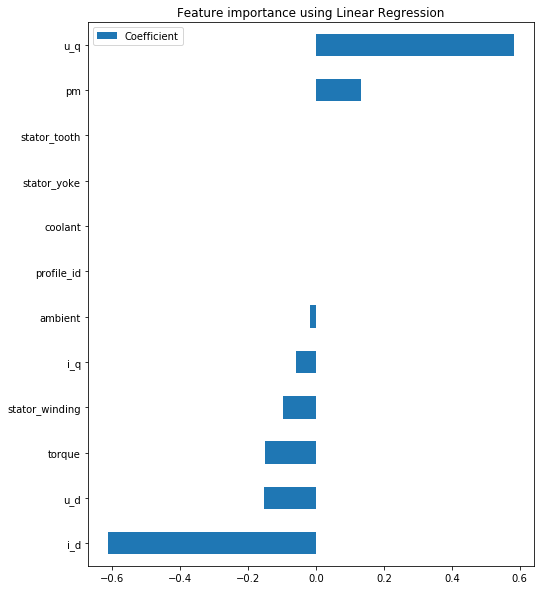

R2-squared: 0.9152911299244825
mean squared error: 0.08500977700829546
root squared mean squared error: 0.29156436169102606


In [70]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import Lasso
ll = Lasso(alpha=0.01)
ll.fit(X_train, y_train)
predictions = ll.predict(X_test)
fig, ax = plt.subplots(2, sharex=True, sharey=True)
ax[0].plot(y_test.to_numpy(), color = 'blue')
ax[1].plot(predictions, color = 'orange')
plt.show()

coeff_df = pd.DataFrame(ll.coef_, X.columns, columns=['Coefficient'])  
print(coeff_df)
imp_coef = coeff_df.sort_values(by='Coefficient')
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Linear Regression")
plt.show()

print('R2-squared:', ll.score(X_test,y_test))
print('mean squared error:', mean_squared_error(y_test, predictions))
print('root squared mean squared error:', math.sqrt(mean_squared_error(y_test, predictions)))

## Ridge reggression

Use the same training and test sets to fit the data to Ridge regression model. Plot the actual vs predicted values. 

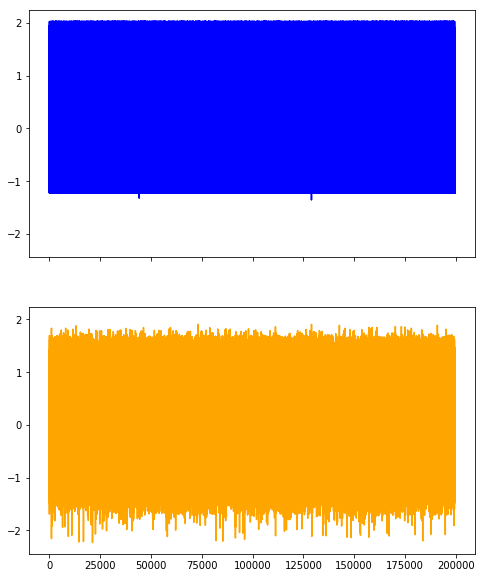

{'alpha': 0.01, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': 938, 'solver': 'auto', 'tol': 0.001}
R2-squared: 0.9278644459097456
mean squared error: 0.07239179748372883
root squared mean squared error: 0.26905723830391337


In [71]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.01, random_state=938)
rr.fit(X_train, y_train)
predictions = rr.predict(X_test)
fig, ax = plt.subplots(2, sharex=True, sharey=True)
ax[0].plot(y_test.to_numpy(), color = 'blue')
ax[1].plot(predictions, color = 'orange')
plt.show()
print(rr.get_params())
print('R2-squared:', rr.score(X_test,y_test))
print('mean squared error:', mean_squared_error(y_test, predictions))
print('root squared mean squared error:', math.sqrt(mean_squared_error(y_test, predictions)))

## Random Forest

In order to improve the performance of the model, we can use an ensemble. We are going to use a Random Forest, which is a combination of trees. 

You can use the RandomForestRegressor model from sklearn.ensemble

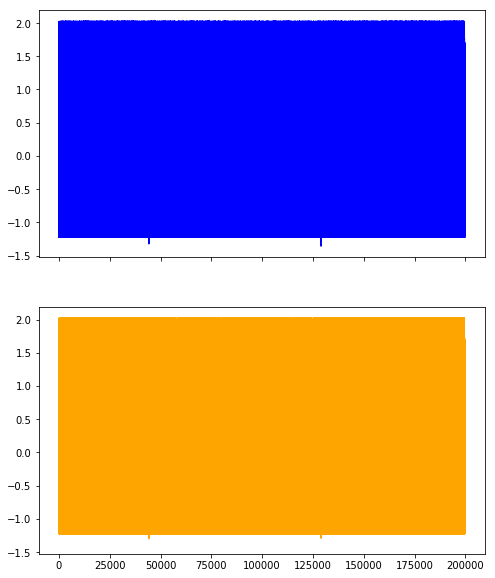

R2-squared: 0.9997999019190486
mean squared error: 0.00020080887900284693
root squared mean squared error: 0.014170704957864549


In [69]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 10, random_state = 123)
rf_model = rf_model.fit(X_train, y_train)
predictions = rf_model.predict(X_test)
fig, ax = plt.subplots(2, sharex=True, sharey=True)
ax[0].plot(y_test.to_numpy(), color = 'blue')
ax[1].plot(predictions, color = 'orange')
plt.show()
print('R2-squared:', rf_model.score(X_test,y_test))
print('mean squared error:', mean_squared_error(y_test, predictions))
print('root squared mean squared error:', math.sqrt(mean_squared_error(y_test, predictions)))